# This notebook creates some of the figures from the paper "Improving Interpretability in Medical Imaging Diagnosis using Adversarial Training"

https://arxiv.org/pdf/2012.01166.pdf

## Use CPU machines only (not GPU machines!). The next command is expected to fail.

In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Install Github Project

In [6]:
%cd /content
!git clone https://github.com/margiki/Interpretability-Adversarial.git
%cd /content/Interpretability-Adversarial
!pip install -r requirements.txt

/content
Cloning into 'Dissertation-robustness'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1190 (delta 1), reused 0 (delta 0), pack-reused 1183
Receiving objects: 100% (1190/1190), 68.65 MiB | 32.44 MiB/s, done.
Resolving deltas: 100% (830/830), done.
fatal: not a git repository (or any of the parent directories): .git
/content/Dissertation-robustness
     |████████████████████████████████| 122kB 7.6MB/s 
     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 153kB 41.4MB/s 
     |████████████████████████████████| 1.4MB 46.1MB/s 
     |████████████████████████████████| 163kB 45.1MB/s 
     |████████████████████████████████| 153kB 48.4MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 460kB 52.2MB/s 
     |████████████████████████████████| 2.7MB 49.3MB/s 
     |████████████████████████████████| 61k

# User setup

In [2]:
# connect to Google Drive to download the necessary materials
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Make your sure uploaded the [trained models and data splits](https://drive.google.com/file/d/1t4pozXp_AhoAZz5UShI3iwGZ-ncF9aSI/view?usp=sharing) to your Google Drive, because you need access to them.

In [43]:
# TODO-USER change these when running the notebook
# Upload the trained models to your Google drive
REPRODUCIBILITY_PATH = None (e.g.,path of the reproducibility files '/content/drive/My\ Drive/reproducibility'
KAGGLE_USERNAME = None # your_name
KAGGLE_KEY = None # your_key

In [44]:
DATA_SPLIT_PATH = f"{REPRODUCIBILITY_PATH}/dataset_splits/*"
USER_MODELS_PATH = f"{REPRODUCIBILITY_PATH}/models"

# Download the data

In [3]:
# The dataset is downloaded from Kaggle. You need to create a free account and add your token here.
!mkdir /root/.kaggle

import json
token = {"username":f"{KAGGLE_USERNAME}","key":f"{KAGGLE_KEY}"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [4]:
!mkdir /content/data
!kaggle datasets download kmader/skin-cancer-mnist-ham10000 -p /content/data

100% 5.19G/5.20G [01:12<00:00, 48.3MB/s]
100% 5.20G/5.20G [01:12<00:00, 77.0MB/s]


In [5]:
# Unzip the whole zipfile into /content/data
!unzip -o /content/data/skin-cancer-mnist-ham10000.zip -d /content/data

!rm -rf /content/data/HAM10000_images_part_1
!rm -rf /content/data/HAM10000_images_part_2

%cd /content/data/ham10000_images_part_1/
!ls -1 | wc -l
%cd /content/data/ham10000_images_part_2/
!ls -1 | wc -l

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: /content/data/ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: /content/data/ham10000_images_part_2/IS

In [ ]:
%cd /content/Interpretability-Adversarial
!git pull

# Download the data splits

In [45]:
# Simple method: upload the 'dataset_splits' folder content into /content/data in Colab
# Alternative method: upload the dataset_splits folder into your Google Drive, and past the path below.
!gsutil -m cp -R $DATA_SPLIT_PATH /content/data/

Copying file:///content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/dataset_splits/3cls_balanced_1200_train.csv...
Copying file:///content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/dataset_splits/3cls_balanced_1200_train_val.csv...
Copying file:///content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/dataset_splits/3cls_balanced_2400_train.csv...
Copying file:///content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/dataset_splits/3cls_balanced_600_train_val.csv...
Copying file:///content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/dataset_splits/varying_training_ratio/3cls_balanced_50nevi_train_val.csv...
Copying file:///content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/dataset_splits/3cls_balanced_test.csv...
Copy

## Imports

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import torch as ch
import torch.nn.functional as F
from torchvision import transforms
import pandas as pd
import time
import random
from PIL import Image
from functools import partial
import cox.store
from cox.utils import Parameters
from tqdm.notebook import tqdm
from collections import OrderedDict
from torch.utils.data.dataloader import DataLoader
import copy

from captum.attr import Saliency, IntegratedGradients, DeepLift, NoiseTunnel, LayerAttribution, FeatureAblation
from captum.attr import visualization as viz

# To enable importing robustness directory
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from robustness.datasets import CIFAR
from robustness.tools.utils import fix_random_seed
from robustness import model_utils, train, defaults
from robustness.tools.vis_tools import show_image_row
from robustness.datasets import HAM10000_dataset, HAM10000_3cls, HAM10000_dataset_3cls_balanced, get_mask, ablate_features, save_saliency_map
from robustness.evaluation import plot_confusion_matrix, plot_top1_predicted_probability, plot_saliency, tensor_img_to_numpy, compute_gradcam, restore_model, evaluate_model, compute_occlusion, compute_accuracies_per_class,compute_f1_score

  pip install torch-lr-finder -v --global-option="amp"


# Config

In [10]:
train_file_name = '3cls_balanced_2400_train.csv::0'
test_file_name = '3cls_balanced_test.csv'

# Fine-tuning
train_file_name_2 = '3cls_balanced_2400_train_val.csv::0'
test_file_name_2 = '3cls_balanced_test_without_val.csv'

NUM_WORKERS = 8
BATCH_SIZE = 16

In [11]:
MODELS_PATH = USER_MODELS_PATH
ds_path = '/content/data'
device = 'cpu'

# Create dataset and dataloader

In [12]:
dataset = HAM10000_3cls(ds_path, test_file_name)
transform_test = dataset.transform_test
labels_vals = dataset.label_mapping.keys()

train_dataset_object = HAM10000_dataset_3cls_balanced(ds_path, file_name=train_file_name, transform=transform_test, train=True)
test_dataset_object = HAM10000_dataset_3cls_balanced(ds_path, file_name=test_file_name, transform=transform_test, test=True)

Created dataset of length: 2400
Created dataset of length: 897


In [13]:
dataset2 = HAM10000_3cls(ds_path, test_file_name_2)
train_dataset_object_2 = HAM10000_dataset_3cls_balanced(ds_path, file_name=train_file_name_2, transform=transform_test, train=True)
test_dataset_object_2 = HAM10000_dataset_3cls_balanced(ds_path, file_name=test_file_name_2, transform=transform_test, test=True)

Created dataset of length: 2400
Created dataset of length: 747


In [14]:
test_loader = DataLoader(test_dataset_object, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, pin_memory=True)

In [15]:
xb, yb = next(iter(test_loader))

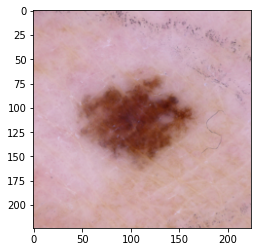

In [16]:
plt.imshow(tensor_img_to_numpy(xb[9]))

## Restore models

### Models 3cls_2400 no background

ResNet-18 - PGD l2

In [17]:
model_sd = restore_model(MODELS_PATH, 'cv=0_full_std_lr=0.0003_2400_2020-05-13---08:53:27', 'standard', dataset, device)

=> loading checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/cv=0_full_std_lr=0.0003_2400_2020-05-13---08:53:27/checkpoint.pt.latest'
=> loaded checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/cv=0_full_std_lr=0.0003_2400_2020-05-13---08:53:27/checkpoint.pt.latest' (epoch 25)


In [18]:
model_10 = restore_model(MODELS_PATH, 'cv=0_full_adv_eps=1_lr=0.0003_2400_2020-05-13---08:53:27', 'adv 1', dataset, device)
model_20 = restore_model(MODELS_PATH, 'cv=0_full_adv_eps=2_lr=0.0003_2400_2020-05-13---08:57:50', 'adv 2', dataset, device)
model_30 = restore_model(MODELS_PATH, 'cv=0_full_adv_eps=3_lr=0.0003_2400_2020-05-13---08:57:50', 'adv 3', dataset, device)
model_40 = restore_model(MODELS_PATH, 'cv=0_full_adv_eps=4_lr=0.0003_2400_2020-05-13---19:46:52', 'adv 4', dataset, device)
model_50 = restore_model(MODELS_PATH, 'cv=0_full_adv_eps=5_lr=0.0003_2400_2020-05-13---19:46:52', 'adv 5', dataset, device)
model_60 = restore_model(MODELS_PATH, 'cv=0_full_adv_eps=6_lr=0.0003_2400_2020-05-13---19:46:52', 'adv 6', dataset, device)
model_70 = restore_model(MODELS_PATH, 'cv=0_full_adv_eps=7_lr=0.0003_2400_2020-05-13---19:46:52', 'adv 7', dataset, device)
model_80 = restore_model(MODELS_PATH, 'cv=0_full_adv_eps=8_lr=0.0003_2400_2020-05-13---19:46:52', 'adv 8', dataset, device)
model_90 = restore_model(MODELS_PATH, 'cv=0_full_adv_eps=9_lr=0.0003_2400_2020-05-13---19:46:52', 'adv 9', dataset, device)

=> loading checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/cv=0_full_adv_eps=1_lr=0.0003_2400_2020-05-13---08:53:27/checkpoint.pt.latest'
=> loaded checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/cv=0_full_adv_eps=1_lr=0.0003_2400_2020-05-13---08:53:27/checkpoint.pt.latest' (epoch 25)
=> loading checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/cv=0_full_adv_eps=2_lr=0.0003_2400_2020-05-13---08:57:50/checkpoint.pt.latest'
=> loaded checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/cv=0_full_adv_eps=2_lr=0.0003_2400_2020-05-13---08:57:50/checkpoint.pt.latest' (epoch 25)
=> loading checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/cv=0_full_adv_eps=3

## Standard fine-tune last layers

In [19]:
aux_model         = restore_model(MODELS_PATH, 'full_stability_seed=2_2020-06-07---11:18:40', 'standard seed 2', dataset, device)
transfer_learning_unfreezeto1_eps3 = restore_model(MODELS_PATH, 'transfer_learning_unfreezeto=1_eps=3_2020-06-09---19:59:55', 'unfreezeto=1 eps3', dataset2, device)
transfer_learning_unfreezeto2_eps3 = restore_model(MODELS_PATH, 'transfer_learning_unfreezeto=2_eps=3_2020-06-09---19:59:55', 'unfreezeto=2 eps3', dataset2, device)
transfer_learning_unfreezeto3_eps3 = restore_model(MODELS_PATH, 'transfer_learning_unfreezeto=3_eps=3_2020-06-09---19:59:55', 'unfreezeto=3 eps3', dataset2, device)
transfer_learning_unfreezeto4_eps3 = restore_model(MODELS_PATH, 'transfer_learning_unfreezeto=4_eps=3_2020-06-09---19:59:55', 'unfreezeto=4 eps3', dataset2, device)
transfer_learning_unfreezeto5_eps3 = restore_model(MODELS_PATH, 'transfer_learning_unfreezeto=5_eps=3_2020-06-10---08:57:50', 'unfreezeto=5 eps3', dataset2, device)
transfer_learning_adversarial_eps3 = restore_model(MODELS_PATH, 'full_stability_eps=3_seed=1_2020-06-07---11:18:40', 'full adversarial eps3', dataset2, device)
transfer_learning_eps3 = [aux_model,
                          transfer_learning_unfreezeto1_eps3,
                          transfer_learning_unfreezeto2_eps3,
                          transfer_learning_unfreezeto3_eps3,
                          transfer_learning_unfreezeto4_eps3,
                          transfer_learning_unfreezeto5_eps3,
                          transfer_learning_adversarial_eps3]

=> loading checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/full_stability_seed=2_2020-06-07---11:18:40/checkpoint.pt.latest'
=> loaded checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/full_stability_seed=2_2020-06-07---11:18:40/checkpoint.pt.latest' (epoch 23)
=> loading checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/transfer_learning_unfreezeto=1_eps=3_2020-06-09---19:59:55/checkpoint.pt.latest'
=> loaded checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/transfer_learning_unfreezeto=1_eps=3_2020-06-09---19:59:55/checkpoint.pt.latest' (epoch 24)
=> loading checkpoint '/content/drive/My Drive/_Facultate/MPhil Cambridge/Dissertation/paper_NeurIPS_2020/reproducibility/models/transfer_learning_unfreezeto=2_eps=3_2020

## Auxiliary functions

In [20]:
def get_image_transformed(image_id, dataset_object, transform_test):
  """
  Retrieve image and apply transforms

  Returns:
  - (tensor_img)
  """
  X_pil, y_true = dataset_object._getitem_image_id(image_id)
  X_trans = transform_test(X_pil)

  return X_trans, y_true

def get_random_indices(no_per_class, dataset_object):
  """
  Pick a number of indices from each class.

  - no_per_class (int): number of images per class
  - dataset_object (Dataset)
  # - all_correct (boolean, optional): if `True`, then all models must predict
  #     the correct label on all images
  """
  indices = []

  for cls_id in dataset.label_mapping.keys():
      ids = dataset_object.df[dataset_object.df['type'] == cls_id]['image_id']
      
      indices_to_take = np.random.permutation(ids)[:no_per_class]
      indices.extend(indices_to_take)
  return indices

def get_indices_correct_prediction(models, count, lesion_dx):
  """
  Return a random indice on which all models have the correct prediction

  - models (list) - list of models (dict)
  - count (int): the number of ids to retrieve
  - lesion_dx (int): type of lesion (0=nv, 1=mel, 2=bkl)

  Returns:
  - list of image_ids
  """
  aux = models[0]['test_results']

  rows_ids_random = np.random.permutation(list(aux[aux.y_true == lesion_dx].image_id))
  indices_to_return = []

  for image_id in rows_ids_random:
    is_correct = True
    for model in models:
      row = model['test_results'][model['test_results'].image_id == image_id].iloc[0]
      if row['y_pred'] != row['y_true']:
        is_correct = False

    if is_correct:
      indices_to_return.append(image_id)

    if len(indices_to_return) == count:
      break

  return indices_to_return

In [21]:
correct_indices = get_indices_correct_prediction([model_40], 20, 0)
correct_indices

['ISIC_0026680',
 'ISIC_0025369',
 'ISIC_0025872',
 'ISIC_0031438',
 'ISIC_0028375',
 'ISIC_0032464',
 'ISIC_0024543',
 'ISIC_0033347',
 'ISIC_0026819',
 'ISIC_0029939',
 'ISIC_0025039',
 'ISIC_0029604',
 'ISIC_0031260',
 'ISIC_0024531',
 'ISIC_0030000',
 'ISIC_0029736',
 'ISIC_0026936',
 'ISIC_0029803',
 'ISIC_0030773',
 'ISIC_0028446']

## Plot Saliency Maps

In [22]:
def plot_saliecy_map(id, models, method, outlier_perc=1, nt_type='smoothgrad_sq'):
  image_transf, y_true = get_image_transformed(id, test_dataset_object, transform_test)
  saliency_data = plot_saliency(image_transf, y_true, id, dataset,
                  models=models,
                  title='Saliency Maps',
                  saliency_abs=True, viz_sign='absolute_value',
                  plot_saliency_distribution=False,
                  saliency_methods=[method], sg_stdev_perc=0.05, sg_samples=50, nt_type=nt_type, ig_baseline='white',
                  outlier_perc = outlier_perc,
                  show_prediction_color=False)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Figures from the Workshop paper

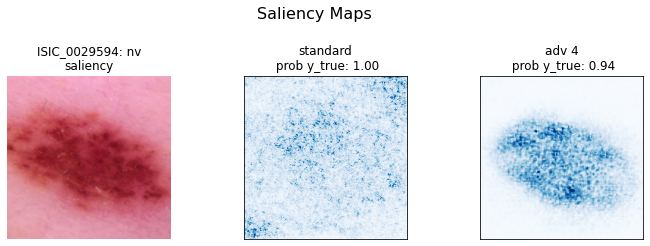

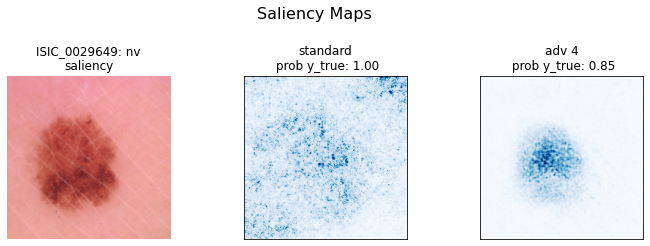

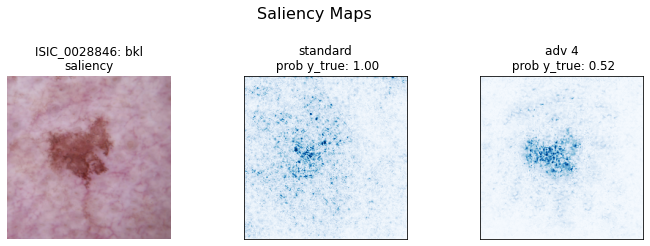

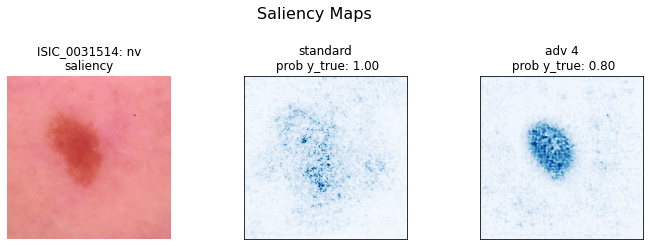

In [23]:
# Figure 1 - Gradient
for id in ['ISIC_0029594', 'ISIC_0029649', 'ISIC_0028846', 'ISIC_0031514']:
  plot_saliecy_map(id, [model_sd, model_40], 'saliency', 1)

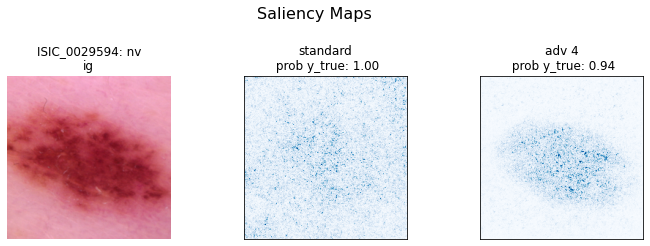

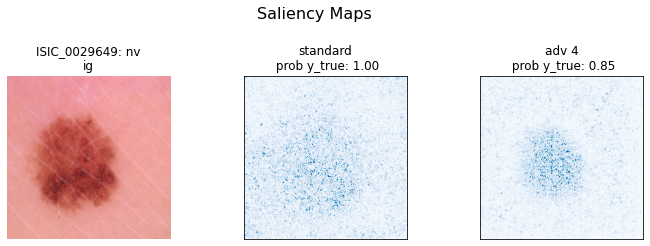

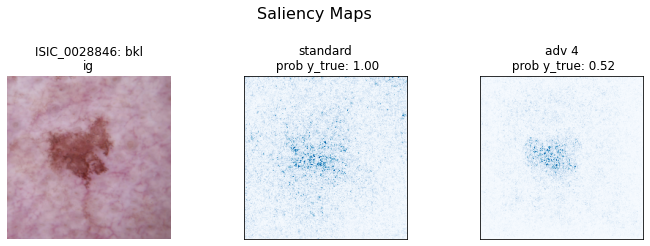

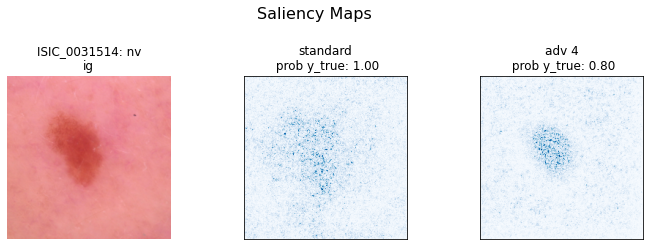

In [24]:
# Figure 2 - Integrated Gradients
for id in ['ISIC_0029594', 'ISIC_0029649', 'ISIC_0028846', 'ISIC_0031514']:
  plot_saliecy_map(id, [model_sd, model_40], 'ig', 1)

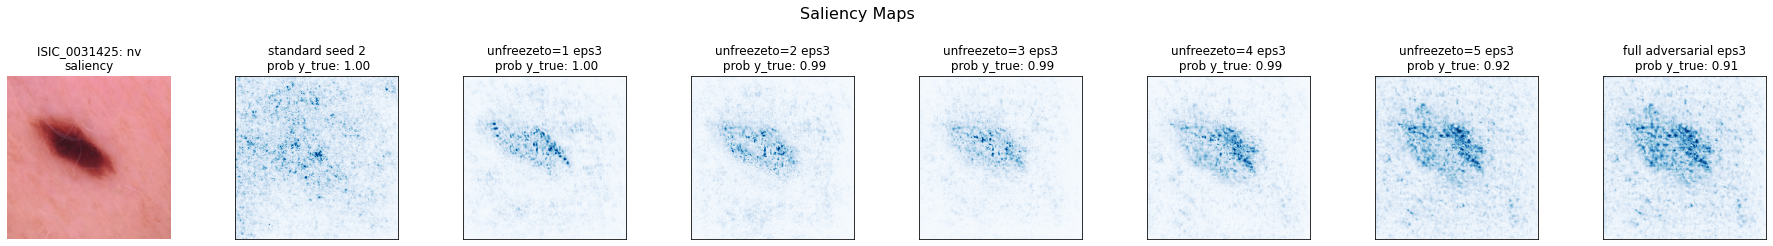

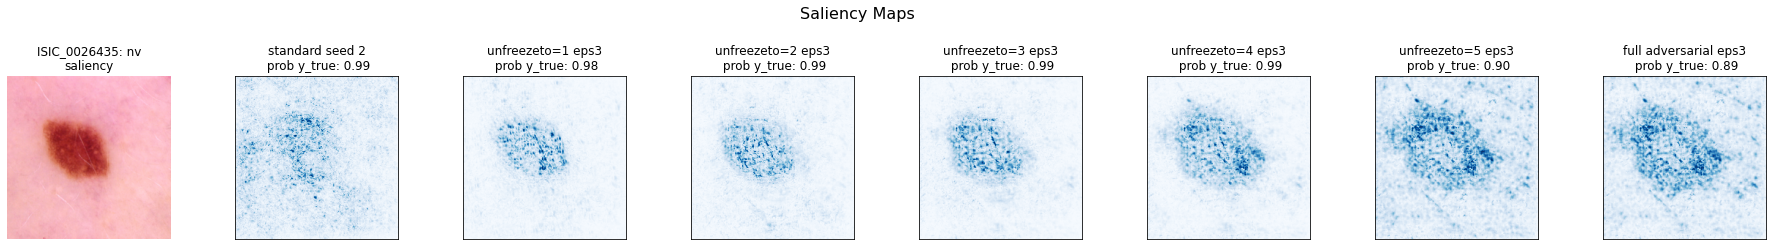

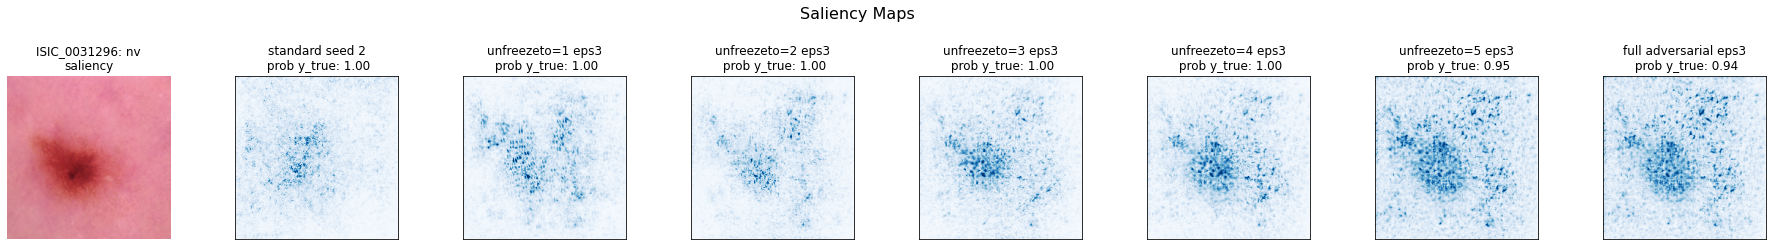

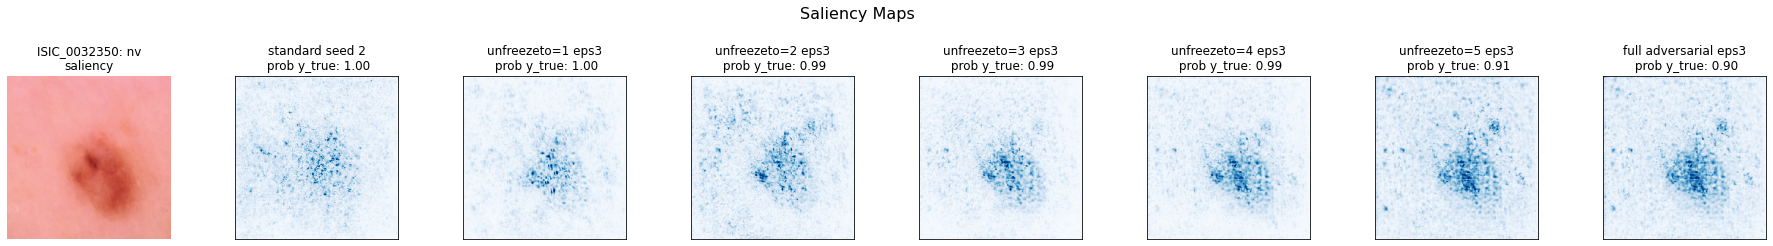

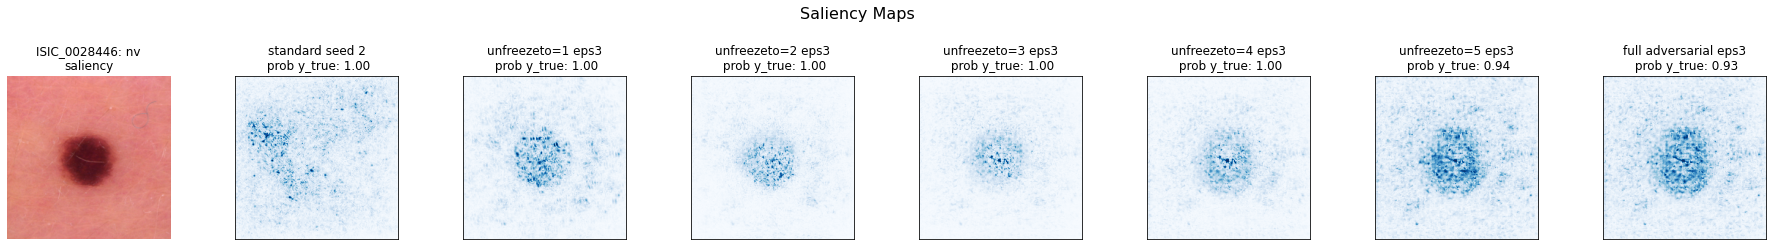

In [25]:
# Figure 5 - Fine-tuning
for id in ['ISIC_0031425', 'ISIC_0026435', 'ISIC_0031296', 'ISIC_0032350', 'ISIC_0028446']:
  plot_saliecy_map(id, transfer_learning_eps3, 'saliency', 1)

# Figure 11 - Gradient saliency map using robust models trained with different adversary sizes
This image highlight fail-cases, though saliency methods are known for not being reliable https://arxiv.org/abs/1711.00867

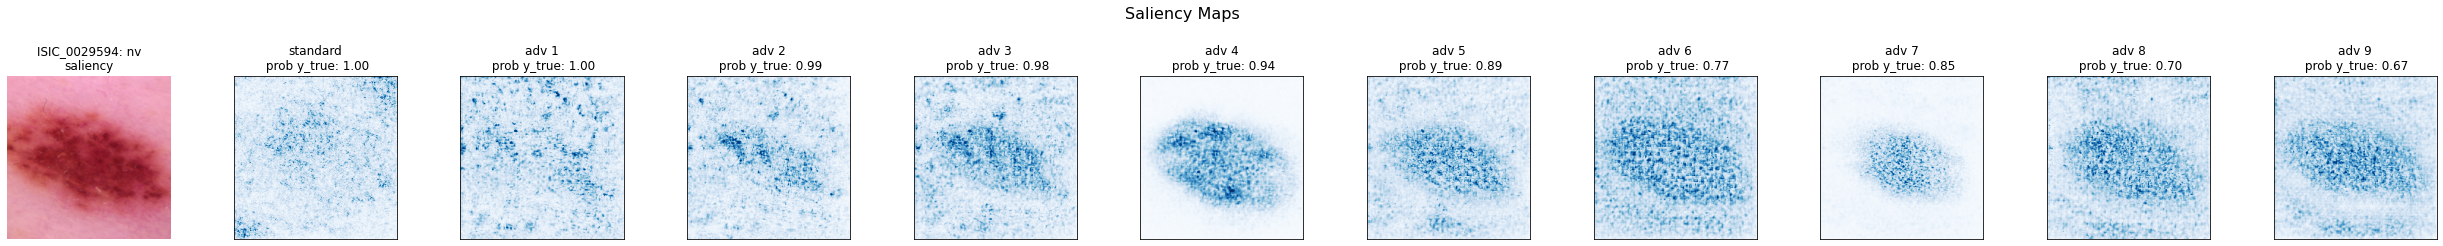

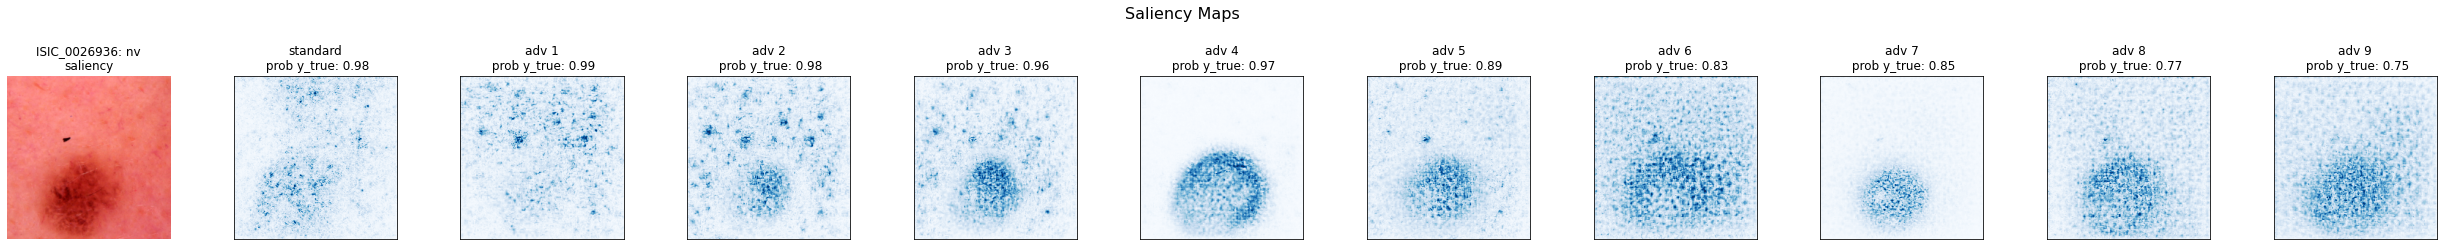

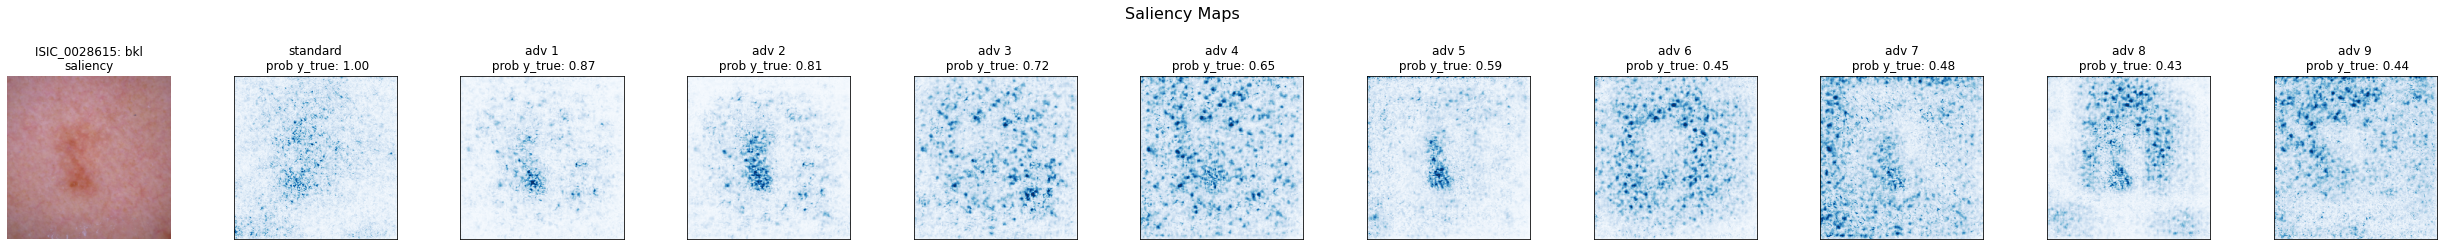

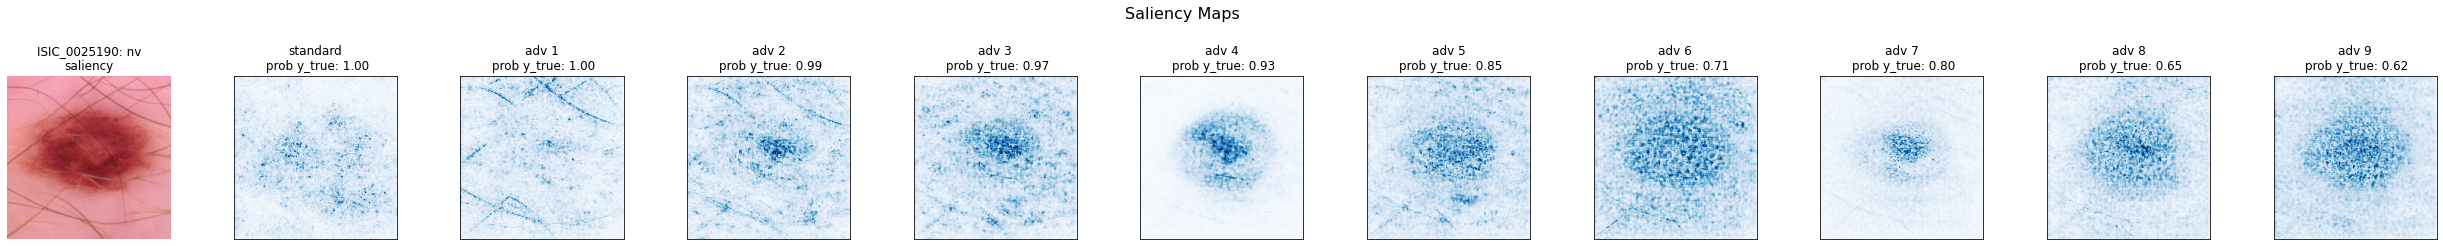

In [26]:
models_adv_power = [model_sd, model_10, model_20, model_30, model_40, model_50, model_60, model_70, model_80, model_90]
for id in ['ISIC_0029594', 'ISIC_0026936', 'ISIC_0028615', 'ISIC_0025190']:
  plot_saliecy_map(id, models_adv_power, 'saliency', 1)